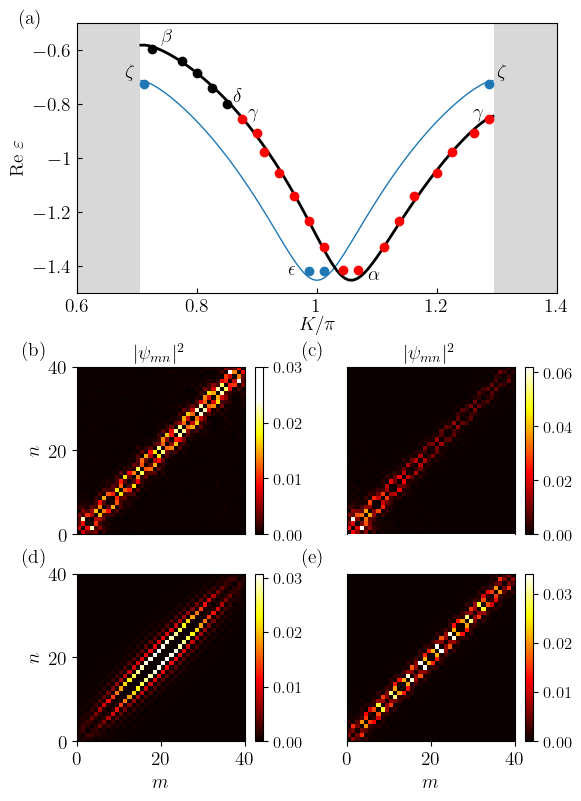

In [27]:
import numpy as np
import cmath
import math
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import FancyArrowPatch

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["CM"],
    "mathtext.fontset": "cm"  # 使用CM Math作为数学模式字体
})

ksi = 0.7
psi = math.pi*0.35


x_non = np.load('x_non.npy')
y_non = np.load('y_non.npy')
x_chiral = np.load('x_chiral.npy')
y_chiral = np.load('y_chiral.npy')
x1 = np.load('x1.npy')
y1 = np.load('y1.npy')
x2 = np.load('x2.npy')
y2 = np.load('y2.npy')
F1_712 = np.load('F1_712.npy')
F1_716 = np.load('F1_716.npy')
nonF1_417 = np.load('nonF1_417.npy')
nonF1_746 = np.load('nonF1_746.npy')
pi = math.pi

N = 40
M = 2*N

x3 = []
y3 = []

# non 417
x3.append(9.385508052599507-2*pi)
y3.append(-1.4172598205991562)
x3.append(3.1808625617596653)
y3.append(-1.4172598205991562)

# non 746
x3.append(4.044800541496859)
y3.append(-0.7262281791383884)
x3.append(8.521570072862314-2*pi)
y3.append(-0.7262281791383884)

fig = plt.figure(figsize=(6, 9))

# 手动设置每个子图的位置
ax1 = fig.add_axes([0.05, 0.65, 0.8, 0.3])  # ax1: 第一行
ax2 = fig.add_axes([0.05, 0.35, 0.31, 0.25])  # ax2: 第二行左
ax21 = fig.add_axes([0.5, 0.35, 0.31, 0.25])  # ax21: 第二行右
ax3 = fig.add_axes([0.05, 0.12, 0.31, 0.25])  # ax3: 第三行左
ax31 = fig.add_axes([0.5, 0.12, 0.31, 0.25])  # ax31: 第三行右


ax1.text(-0.12, 1.05, '(a)', transform=ax1.transAxes, fontsize=14, va='top')
ax2.text(-0.33, 1.15, '(b)', transform=ax2.transAxes, fontsize=14, va='top')
ax21.text(-0.27, 1.15, '(c)', transform=ax21.transAxes, fontsize=14, va='top')
ax3.text(-0.33, 1.15, '(d)', transform=ax3.transAxes, fontsize=14, va='top')
ax31.text(-0.27, 1.15, '(e)', transform=ax31.transAxes, fontsize=14, va='top')
# ax21.text(0.7, 0.4, r'$K$', transform=ax21.transAxes, c='white', fontsize=16, va='top')
# ax31.text(0.6, 0.3, r'$K$', transform=ax31.transAxes, c='white', fontsize=16, va='top')


plt.sca(ax1)
rectangle1 = patches.Rectangle((0.6*pi, -1.5), 0.105*pi, 1, linewidth=0, edgecolor='none', facecolor='grey', alpha=0.3)
plt.gca().add_patch(rectangle1)

rectangle2 = patches.Rectangle((1.295*pi, -1.5), 0.105*pi, 1, linewidth=0, edgecolor='none', facecolor='grey', alpha=0.3)
plt.gca().add_patch(rectangle2)

ax1.plot(x_non,y_non, linewidth = 1)
ax1.plot(x_chiral,y_chiral,c='black', linewidth=2)
ax1.scatter(x1,y1, c='r', zorder=2)
ax1.scatter(x2,y2,c='black', zorder = 2)

ax1.scatter(x3,y3,c='#1f77b4', zorder = 2)

ax1.set_ylim(-1.5,-0.5)
ax1.set_xlim(0.6*pi,1.4*pi)
ax1.set_xticks([0.6*math.pi,0.8*math.pi,pi,1.2*math.pi,1.4*math.pi],[r'$0.6$',r'$0.8$',r'$1$',r'$1.2$',r'$1.4$'], fontsize = 14)
ax1.set_yticks([-1.4,-1.2,-1,-0.8,-0.6],[r'$-1.4$',r'$-1.2$',r'$-1$',r'$-0.8$',r'$-0.6$'],fontsize=14)
ax1.set_xlabel(r'$K/\pi$',labelpad=-0, x=0.5,fontsize = 14)
# ax1.set_xlabel(r'$K/\pi$',labelpad=-3,fontsize = 14)
ax1.set_ylabel(r'$\mathrm{Re}\ \varepsilon$',fontsize = 14)
ax1.tick_params(direction='in')

ax1.text(1.085*pi,-1.45,r'$\alpha$', fontsize =14)
ax1.text(0.74*pi,-0.57,r'$\beta$', fontsize =14)
ax1.text(0.885*pi, -0.85, r'$\gamma$', fontsize = 14)
ax1.text(1.26*pi, -0.85, r'$\gamma$', fontsize = 14)
ax1.text(0.86*pi, -0.79, r'$\delta$', fontsize = 14)
ax1.text(0.952*pi, -1.43, r'$\epsilon$', fontsize = 14)
ax1.text(0.68*pi, -0.7, r'$\zeta$', fontsize = 14)
ax1.text(1.3*pi, -0.7, r'$\zeta$', fontsize = 14)


cax2 = ax2.imshow(F1_712, cmap='hot', interpolation='nearest', origin = 'lower')
ax2.set_title(r'$|\psi_{mn}|^2$',fontsize = 14)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.1)  # 调整 size 和 pad
cbar2 = fig.colorbar(cax2, cax=cax)
cbar2.ax.tick_params(labelsize=12)
cbar2.set_ticks([0,0.01,0.02,0.03])

# ax2.set_xticks([0-0.5,N/2-0.5,N-0.5],[r'$0$',r'$20$',r'$40$'],fontsize = 14)
ax2.set_yticks([0-0.5,N/2-0.5,N-0.5],[r'$0$',r'$20$',r'$40$'],fontsize = 14)
# ax2.set_xlabel(r'$m$',fontsize = 14)
# ax2.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
# ax2.spines['bottom'].set_visible(False)
ax2.set_xticks([])
ax2.set_xlabel('')
ax2.set_ylabel(r'$n$',fontsize = 14)

cax21 = ax21.imshow(F1_716, cmap='hot', interpolation='nearest', origin = 'lower')
ax21.set_title(r'$|\psi_{mn}|^2$',fontsize = 14)
divider = make_axes_locatable(ax21)
cax = divider.append_axes("right", size="5%", pad=0.1)  # 调整 size 和 pad
cbar21 = fig.colorbar(cax21, cax=cax)
cbar21.ax.tick_params(labelsize=12)
cbar21.set_ticks([0,0.02,0.04,0.06])

# ax21.set_xticks([0,M,2*M],[r'$-\pi$',r'$0$',r'$\pi$'],fontsize = 14)
ax21.set_yticks([])
# ax21.set_xlabel(r'$k_1$',fontsize = 14)
ax21.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax21.spines['bottom'].set_visible(False)
# ax21.spines['left'].set_visible(False)
# ax21.set_ylabel(r'$k_2$',labelpad=-5, y=0.5,fontsize = 14)

pointx1 = np.arange(138,153)
pointy1 = 123*2 - pointx1

pointx2 = np.arange(57,57+15)
pointy2 = 42*2 - pointx2

arrowx = np.arange(65+20,146-20)
arrowy = arrowx - 46

# ax21.plot(pointx1,pointy1,c='white')
# ax21.plot(pointx2,pointy2,c='white')

# arrow1 = FancyArrowPatch((65+15, 19+15), (146-15, 100-15), color='white', arrowstyle='-|>', mutation_scale=15)
# ax21.add_patch(arrow1)



cax3 = ax3.imshow(nonF1_417, cmap='hot', interpolation='nearest', origin = 'lower')
# ax3.set_title(r'$|\psi_{mn}|^2$', fontsize =14)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.1)  # 调整 size 和 pad
cbar3 = fig.colorbar(cax3, cax=cax)
cbar3.ax.tick_params(labelsize=12)
cbar3.set_ticks([0,0.01,0.02,0.03])

ax3.set_xticks([0-0.5,N/2-0.5,N-0.5],[r'$0$',r'$20$',r'$40$'],fontsize = 14)
ax3.set_yticks([0-0.5,N/2-0.5,N-0.5],[r'$0$',r'$20$',r'$40$'],fontsize = 14)
ax3.set_xlabel(r'$m$',fontsize = 14)
ax3.set_ylabel(r'$n$',fontsize = 14)

cax31 = ax31.imshow(nonF1_746, cmap='hot', interpolation='nearest', origin = 'lower')
# ax31.set_title(r'$|\psi_{k_1,k_2}|^2$',fontsize = 14)
divider = make_axes_locatable(ax31)
cax = divider.append_axes("right", size="5%", pad=0.1)  # 调整 size 和 pad
cbar31 = fig.colorbar(cax31, cax=cax)
cbar31.ax.tick_params(labelsize=12)
cbar31.set_ticks([0,0.01,0.02,0.03])

# pointx = np.arange(43,58)
# pointy = 29*2-pointx
# ax31.plot(pointx,pointy, c='white')

# arrow2 = FancyArrowPatch((51+10, 7+10), (132-20, 89-20), color='white', arrowstyle='-|>', mutation_scale=15)
# ax31.add_patch(arrow2)


ax31.set_xticks([0-0.5,N/2-0.5,N-0.5],[r'$0$',r'$20$',r'$40$'],fontsize = 14)
# ax31.set_xticks([0,M,2*M],[r'$-\pi$',r'$0$',r'$\pi$'],fontsize = 14)
ax31.set_yticks([])
ax31.set_xlabel(r'$m$',fontsize = 14)
# ax31.set_ylabel(r'$k_2$',labelpad=-5, y=0.5,fontsize = 14)



plt.savefig('FigS3.pdf', format='pdf',bbox_inches='tight')
plt.show()
